Name: Bryan Jun Kit Wong
<br>
Student ID: 32882424

In [2]:
# Import all modules needed for this assignment.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
%matplotlib inline

Read the CSV file and assign it to variable `a_road_deaths`

In [3]:
# Read the CSV and assign it to variable a_road_deaths.
a_road_deaths = pd.read_csv("Australian_Road_Deaths.csv")

# Task A

## Task A1

In [4]:
# Print the dimensions of the dataset.
a_road_deaths.shape

(9140, 22)

The above output of `(9140, 22)` signifies the amount of data instances and variables exist in this data set via displaying their rows and columns. 
<br>
In this case, there are 9140 rows and 22 columns.

## Task A2

In [5]:
# Count the number of unique rows in National Remoteness Areas.
a_road_deaths["National Remoteness Areas"].nunique()

5

In [6]:
# Count the number of unique rows in SA4 Name 2016.
a_road_deaths["SA4 Name 2016"].nunique()

88

In [7]:
# Count the number of unique rows in National LGA Name 2017.
a_road_deaths["National LGA Name 2017"].nunique()

500

In [8]:
# Count the number of unique rows in National Road Type.
a_road_deaths["National Road Type"].nunique()

9

Number of unique values in the column `National Remoteness Areas`, `SA4 Name 2016`, `National LGA Name 2017` and `National Road Type` is 5, 88, 500 and 9 respectively.

## Task A3

### 1.

In [9]:
# Filters out rows only with the value "Unspecified" in them for the whole dataframe. Will output the shape of the table.
a_road_deaths[a_road_deaths.eq("Unspecified").any(1)].shape

(1, 22)

In [10]:
# Filters out rows only with the value "Undetermined" in them for the whole dataframe. Will output the shape of the table.
a_road_deaths[a_road_deaths.eq("Undetermined").any(1)].shape

(15, 22)

In [11]:
# Filters out rows that are blank (NaN) in them for the whole dataframe. Will output the shape of the table.
a_road_deaths[a_road_deaths.isnull().any(1)].shape

(2287, 22)

In [12]:
# Will filter out all the rows that does not have a missing value.
missing_values = a_road_deaths[(a_road_deaths.eq("Unspecified").any(1)) | (a_road_deaths.eq("Undetermined").any(1)) | (a_road_deaths.isnull().any(1))]
missing_values.shape

(2302, 22)

As shown above, there are 1 row with the `Unspecified` value, 15 rows that are `Undetermined` and 2287 rows that are `blank`. In total, there are 2302 rows with missing values in the whole dataframe.

### 2.

In [13]:
# Deep copy the original dataframe.
road_date = a_road_deaths.copy()
# Replaces the YYYYMM datatype (int 64) by converting it to (datatime64[ns]).
road_date["YYYYMM"] = pd.to_datetime(road_date.YYYYMM, yearfirst=True, format="%Y%m")

# Create two new columns in the original dataframe that extracts the YEAR and Month from the YYYYMM column.
a_road_deaths = a_road_deaths.assign(Year = road_date["YYYYMM"].dt.year)
a_road_deaths = a_road_deaths.assign(Month = road_date["YYYYMM"].dt.month)

# Pop the whole Year and Month column from the dataframe.
year = a_road_deaths.pop("Year")
month = a_road_deaths.pop("Month")
# Insert them at a specified position in the dataframe so that they are after YYYYMM column.
a_road_deaths.insert(3, "Year", year)
a_road_deaths.insert(4, "Month", month)

# Find all unique months with missing values in them.
months_with_missing = a_road_deaths[((a_road_deaths.eq("Unspecified").any(1)) | (a_road_deaths.eq("Undetermined").any(1)) | (a_road_deaths.isnull().any(1)))]["Month"].unique()
sorted(months_with_missing) # Print out an array containing all unique months that at least have one missing value in them.

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

The months_with_missing is an array filled with every unique month that contains at least one missing value. Since every month from 1 - 12 has a missing value, there are ZERO unique months that contains no missing values.

### 3.

In [14]:
# Drop all missing values from the original dataframe.
a_road_deaths = a_road_deaths.drop(missing_values.index)
# Flattens the table. Will drop the index column and replace the original table with the new index.
a_road_deaths.reset_index(drop=True, inplace = True)
a_road_deaths

,Crash ID,State,YYYYMM,Year,Month,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,...,Speed,Driving experience,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day
0,20213034,Qld,202109,2021,9,Saturday,4:00:00,Multiple,No,No,...,41,3,Major Cities of Australia,Brisbane - South,Brisbane (C),Busway,No,No,17_to_25,Night
1,20213026,Qld,202109,2021,9,Wednesday,23:00:00,Multiple,No,No,...,20,3,Major Cities of Australia,Ipswich,Ipswich (C),National or State Highway,No,No,0_to_16,Night
2,20213092,Qld,202109,2021,9,Saturday,2:00:00,Single,No,No,...,53,12,Major Cities of Australia,Logan - Beaudesert,Logan (C),Local Road,No,No,40_to_64,Night
3,20214053,SA,202109,2021,9,Thursday,21:00:00,Single,No,No,...,140,7,Inner Regional Australia,Adelaide - Central and Hills,Adelaide Hills (DC),Sub-Arterial Road,No,No,17_to_25,Night
4,20213178,Qld,202109,2021,9,Sunday,21:00:00,Multiple,No,No,...,71,29,Major Cities of Australia,Gold Coast,Gold Coast (C),Local Road,No,No,40_to_64,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6833,20144083,SA,201401,2014,1,Friday,11:10:00,Multiple,No,Yes,...,20,14,Outer Regional Australia,South Australia - South East,The Coorong (DC),National or State Highway,No,No,40_to_64,Day
6834,20145108,WA,201401,2014,1,Wednesday,11:47:00,Single,No,No,...,142,15,Major Cities of Australia,Perth - South East,Belmont (C),National or State Highway,Yes,No,40_to_64,Day
6835,20144022,SA,201401,2014,1,Monday,9:35:00,Single,No,No,...,0,45,Major Cities of Australia,Adelaide - North,Tea Tree Gully (C),Local Road,No,No,75_or_older,Day
6836,20145072,WA,201401,2014,1,Tuesday,21:30:00,Single,No,No,...,74,43,Remote Australia,Western Australia - Outback (South),Esperance (S),National or State Highway,No,No,75_or_older,Night


Above shows the new dataframe with all missing values (`Unspecified` or `Undetermined` or
blank) removed.

### 4.

In [15]:
# Remove all duplications in the table.
a_road_deaths = a_road_deaths.drop_duplicates()
# Print the table.
a_road_deaths

,Crash ID,State,YYYYMM,Year,Month,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,...,Speed,Driving experience,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day
0,20213034,Qld,202109,2021,9,Saturday,4:00:00,Multiple,No,No,...,41,3,Major Cities of Australia,Brisbane - South,Brisbane (C),Busway,No,No,17_to_25,Night
1,20213026,Qld,202109,2021,9,Wednesday,23:00:00,Multiple,No,No,...,20,3,Major Cities of Australia,Ipswich,Ipswich (C),National or State Highway,No,No,0_to_16,Night
2,20213092,Qld,202109,2021,9,Saturday,2:00:00,Single,No,No,...,53,12,Major Cities of Australia,Logan - Beaudesert,Logan (C),Local Road,No,No,40_to_64,Night
3,20214053,SA,202109,2021,9,Thursday,21:00:00,Single,No,No,...,140,7,Inner Regional Australia,Adelaide - Central and Hills,Adelaide Hills (DC),Sub-Arterial Road,No,No,17_to_25,Night
4,20213178,Qld,202109,2021,9,Sunday,21:00:00,Multiple,No,No,...,71,29,Major Cities of Australia,Gold Coast,Gold Coast (C),Local Road,No,No,40_to_64,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6833,20144083,SA,201401,2014,1,Friday,11:10:00,Multiple,No,Yes,...,20,14,Outer Regional Australia,South Australia - South East,The Coorong (DC),National or State Highway,No,No,40_to_64,Day
6834,20145108,WA,201401,2014,1,Wednesday,11:47:00,Single,No,No,...,142,15,Major Cities of Australia,Perth - South East,Belmont (C),National or State Highway,Yes,No,40_to_64,Day
6835,20144022,SA,201401,2014,1,Monday,9:35:00,Single,No,No,...,0,45,Major Cities of Australia,Adelaide - North,Tea Tree Gully (C),Local Road,No,No,75_or_older,Day
6836,20145072,WA,201401,2014,1,Tuesday,21:30:00,Single,No,No,...,74,43,Remote Australia,Western Australia - Outback (South),Esperance (S),National or State Highway,No,No,75_or_older,Night


The output above displays the new dataframe will all missing values and duplicates removed.

## Task A4

In [16]:
# Creates an aggregate function that counts the instances of each Month and group them together to a new table.
counting_months = {"Month": "count"}
num_of_crashes = a_road_deaths.groupby("Month").agg(counting_months)

# Rename the Month to Number of Crashes for the second column.
num_of_crashes.rename(
    columns = {"Month": "Month", "Month": "Number of Crashes"},
    inplace = True   # Replaces original dataset instead of creating a new one.
    )
# Flattens the table into one level.
num_of_crashes.reset_index()

,Month,Number of Crashes
0,1,593
1,2,514
2,3,654
3,4,575
4,5,554
5,6,556
6,7,596
7,8,637
8,9,531
9,10,530


Above shows the dataframe of the number of crashes each month for 2014 - 2021.

In [44]:
# Gets the top 2 largest amount of crashes in the Number of Crashes column.
top2 = num_of_crashes.nlargest(n = 2, columns = "Number of Crashes")
# Flattens the table into one level.
top2.reset_index()

,Month,Number of Crashes
0,3,654
1,8,637


The 2 months in which the number of crashes are at their largest is `March` and `August`. They have 654 and 637 number of crashes respectively.

## Task A5

### 1.

### a.

In [18]:
# Year and Month extracted in Task A3.2
# Display the dataframe with the Month and Year column added.
a_road_deaths

,Crash ID,State,YYYYMM,Year,Month,Day of week,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,...,Speed,Driving experience,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Time of day
0,20213034,Qld,202109,2021,9,Saturday,4:00:00,Multiple,No,No,...,41,3,Major Cities of Australia,Brisbane - South,Brisbane (C),Busway,No,No,17_to_25,Night
1,20213026,Qld,202109,2021,9,Wednesday,23:00:00,Multiple,No,No,...,20,3,Major Cities of Australia,Ipswich,Ipswich (C),National or State Highway,No,No,0_to_16,Night
2,20213092,Qld,202109,2021,9,Saturday,2:00:00,Single,No,No,...,53,12,Major Cities of Australia,Logan - Beaudesert,Logan (C),Local Road,No,No,40_to_64,Night
3,20214053,SA,202109,2021,9,Thursday,21:00:00,Single,No,No,...,140,7,Inner Regional Australia,Adelaide - Central and Hills,Adelaide Hills (DC),Sub-Arterial Road,No,No,17_to_25,Night
4,20213178,Qld,202109,2021,9,Sunday,21:00:00,Multiple,No,No,...,71,29,Major Cities of Australia,Gold Coast,Gold Coast (C),Local Road,No,No,40_to_64,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6833,20144083,SA,201401,2014,1,Friday,11:10:00,Multiple,No,Yes,...,20,14,Outer Regional Australia,South Australia - South East,The Coorong (DC),National or State Highway,No,No,40_to_64,Day
6834,20145108,WA,201401,2014,1,Wednesday,11:47:00,Single,No,No,...,142,15,Major Cities of Australia,Perth - South East,Belmont (C),National or State Highway,Yes,No,40_to_64,Day
6835,20144022,SA,201401,2014,1,Monday,9:35:00,Single,No,No,...,0,45,Major Cities of Australia,Adelaide - North,Tea Tree Gully (C),Local Road,No,No,75_or_older,Day
6836,20145072,WA,201401,2014,1,Tuesday,21:30:00,Single,No,No,...,74,43,Remote Australia,Western Australia - Outback (South),Esperance (S),National or State Highway,No,No,75_or_older,Night


The Year and Month are extracted from the YYYYMM column and added into the original `a_road_deaths` dataframe.

### b.

In [19]:
# Get all rows that are car drivers for the Road User column. Filter our all non-car drivers.
car_driver = a_road_deaths.loc[a_road_deaths["Road User"] == "Car driver"].copy()

# Creates an aggregate function that counts the instances of each car driver and group them together to a new table.
counting_crash = {"Road User": "count"}
num_car_crash = car_driver.groupby(["Year", "Month"]).agg(counting_crash)

# Rename the Road User to Number of Crashes for Car Drivers.
num_car_crash.rename(
    columns = {"Road User": "Number of Crashes for Car Drivers"},
    inplace = True   # Replaces original dataset instead of creating a new one.
    )
# Flattens the table into one level.
num_car_crash.reset_index()

,Year,Month,Number of Crashes for Car Drivers
0,2014,1,7
1,2014,2,10
2,2014,3,12
3,2014,4,9
4,2014,5,6
...,...,...,...
88,2021,5,33
89,2021,6,41
90,2021,7,43
91,2021,8,39


Above displays the total number of car driver crashes for a specified year and month.

### c.

In [20]:
# Creates an aggregate function that averages the number of car driver crashes per month.
average_crash = {"Number of Crashes for Car Drivers": "mean"}
mean_crashes = num_car_crash.groupby(["Month"]).agg(average_crash)

# Rename the Number of Crashes for Car Drivers to Mean Number of Car Driver Crashes.
mean_crashes.rename(
    columns = {"Number of Crashes for Car Drivers": "Mean Number of Car Driver Crashes"},
    inplace = True   # Replaces original dataset instead of creating a new one.
    )
# Flattens the table into one level.
mean_crashes.reset_index()

,Month,Mean Number of Car Driver Crashes
0,1,34.375000
1,2,28.750000
2,3,39.250000
3,4,33.375000
4,5,32.750000
5,6,33.500000
6,7,34.000000
7,8,38.750000
8,9,34.250000
9,10,35.142857


The output aboves show the Mean Number of Car Driver Crashes for each Month over a number of years.

### 2.

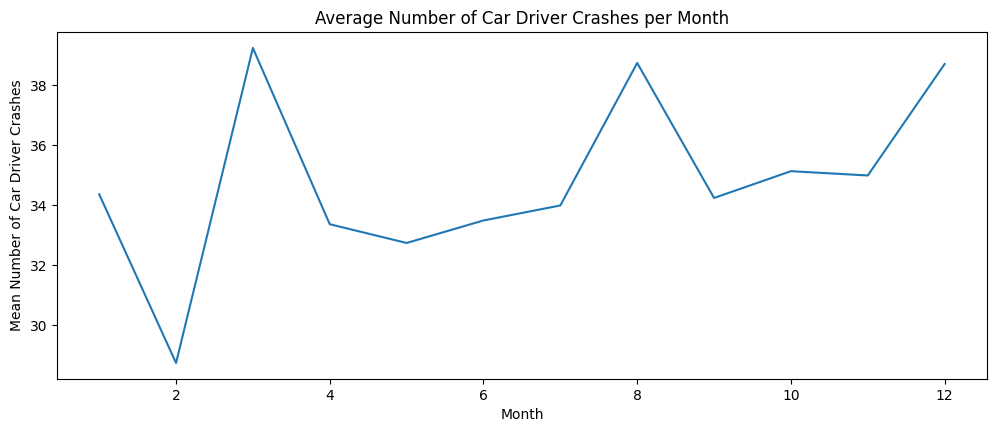

In [45]:
# Flattens the table into one level.
mean_crashes = mean_crashes.reset_index()

# Plot a line graph with the x-axis being Month and the y-axis being Mean Number of Car Driver Crashes.
plt.figure(figsize=[12, 4.5])   # Expand the canvas size.
plt.plot(mean_crashes["Month"], mean_crashes["Mean Number of Car Driver Crashes"])

# Sets the title of the graph.
plt.title("Average Number of Car Driver Crashes per Month")
# Name the x and y labels.
plt.xlabel("Month")
plt.ylabel("Mean Number of Car Driver Crashes")
plt.show()

Above shows a line graph with it's x-axis being the Month and the y-axis being the Mean Number of Car Driver Crashes.

### 3.

There's a massive drop in car accidents from January to February, from 34 Car driver crashes to 28. Then, there's a significant spike in car accidents right after that from February to March, peaking at 39 crashes, before plummeting in April at 33 crashes. From July to August, there is a another increase in car crashes, also reaching 38 before dropping. In November to December, there is another spike in car crashes. 
<br>
<br>
The massive drop in car accidents in January could be alluded to the Australian Summer Holidays. Parents do not need to fetch their children to school and back, leading to less cars on the road hence less car accidents. Furthermore, many Australians will go on holiday overseas during the summer, also resulting in less cars on the road. This all contributes to a lower rate of car crashes in January.
<br>
<br>
Similarly, the humongous increase in car accidents in February to March could be because of the end of the Australian Summer Holidays. As the holidays end, parents have to fetch their children to school and back, teachers have to commute to school etc. As a result, the average number of car crashes increases during that time period.
<br>
<br>
The sudden increase in car crashes in December can be explained due to Christmas. More people will be on the road driving to visit their family for Christmas, resulting in a higher chance of car accidents. Hence, there is a sudden spike of car accidents in December.

## Task A6

### 1.

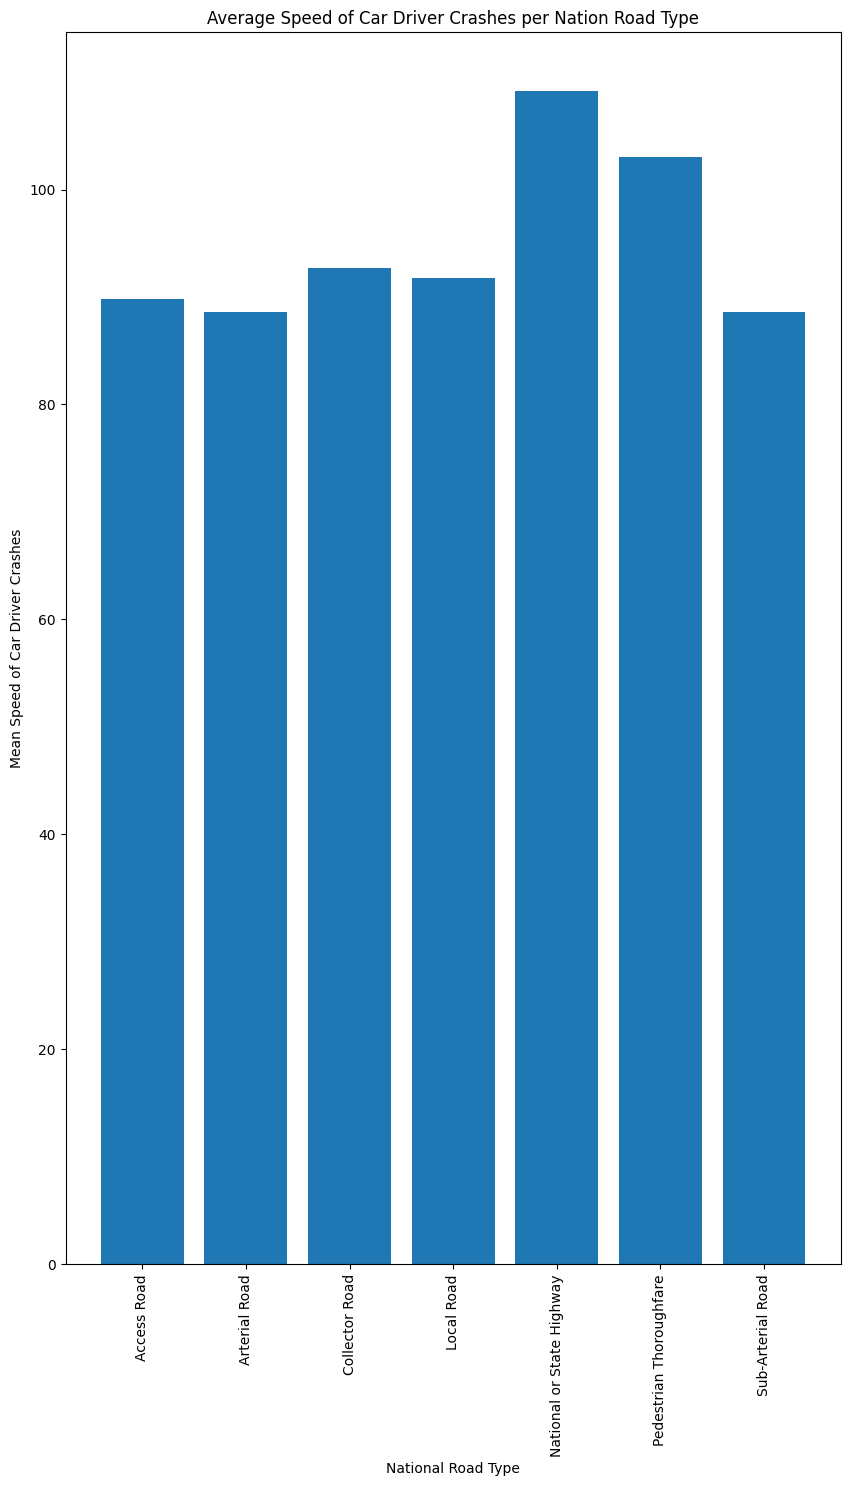

In [46]:
# Creates an aggregate function that averages the speed of car drivers for each national road type.
average_speed = {"Speed": "mean"}
mean_speed = car_driver.groupby(["National Road Type"]).agg(average_speed)

# Rename the Number of Crashes for Car Drivers to Mean Number of Car Driver Crashes.
mean_speed.rename(
    columns = {"Speed": "Mean Speed of Car Driver Crashes"},
    inplace = True   # Replaces original dataset instead of creating a new one.
    )

# Flattens the table into one level.
mean_speed = mean_speed.reset_index()

# Plot the line graph with x-axis being National Road Type and y-axis being Mean SPeed of Car Driver crashes.
plt.figure(figsize=[10, 16])    # Expand the canvas size.
plt.bar(mean_speed["National Road Type"], mean_speed["Mean Speed of Car Driver Crashes"])
# Sets the title of the graph.
plt.title("Average Speed of Car Driver Crashes per Nation Road Type")
# Name the x and y labels.
plt.xlabel("National Road Type")
plt.ylabel("Mean Speed of Car Driver Crashes")
# Rotate the x axis to be 90 degrees
plt.xticks(rotation=90)
plt.show()

Above shows a line graph of the Average Speed of Car Driver Crashes per Nation Road Type where the Nation Road Type is the x-axis and the Mean Speed of Car Driver Crashes is the y-axis.

### 2.

In [23]:
# Get all the counter-intuitive values in the age.
age_error_values = a_road_deaths.loc[a_road_deaths["Age"] < 0].copy()

# Display them
age_error_values[["Age", "Driving experience"]]

,Age,Driving experience
19,-999,40
49,-999,40
4638,-999,40
6312,-999,40


As shown above, there are some age measurements which are in negative. As age can only be in positive integers, this is a measurement error and shall be replace with 0.

In [24]:
index_error = []    # Creates an empty list which will hold all the indexes of rows with counter-intuitive value in the Age column.

# For loop to loop through each counter-intuitive row and changes Age value to 0.
for error_index in age_error_values.index:
    a_road_deaths.loc[error_index, "Age"] = 0   # Changes the counter-intuitive value to 0.
    index_error.append(error_index)             # Append the index of the counter-intuitive row into the list.

# Print out the counter-intuitive rows with the Ages now replaced with 0
a_road_deaths.filter(items=index_error, axis=0)[["Age"]]

,Age
19,0
49,0
4638,0
6312,0


The counter-intuitive values are now all replaced with 0 in the original dataframe.

## Task A7

### 1.

In [25]:
# Get all rows that are vehicle drivers for the Road User column. Filter our all non-vehicle drivers.
car_driver = a_road_deaths.loc[a_road_deaths["Road User"] == "Car driver"].copy()
motorcycle_rider = a_road_deaths.loc[a_road_deaths["Road User"] == "Motorcycle rider"].copy()
other_vehicle = a_road_deaths.loc[a_road_deaths["Road User"] == "Other vehicle driver"].copy()
pedal_cyclist = a_road_deaths.loc[a_road_deaths["Road User"] == "Pedal cyclist"].copy()
total_vehicle = a_road_deaths.loc[(a_road_deaths["Road User"] == "Car driver") | (a_road_deaths["Road User"] == "Motorcycle rider") | (a_road_deaths["Road User"] == "Other vehicle driver") | (a_road_deaths["Road User"] == "Pedal cyclist")].copy()

# Gets only the Age, Speed and Driving experience columns for all vehicle drivers.
comparison_car = car_driver[["Age", "Speed", "Driving experience"]]
comparison_motorcycle = motorcycle_rider[["Age", "Speed", "Driving experience"]]
comparison_other = other_vehicle[["Age", "Speed", "Driving experience"]]
comparison_cyclist = pedal_cyclist[["Age", "Speed", "Driving experience"]]
comparison_total = total_vehicle[["Age", "Speed", "Driving experience"]]

# Display the corraltion between each data for Car drivers. 
comparison_car.corr()

,Age,Speed,Driving experience
Age,1.000000,0.014749,0.943498
Speed,0.014749,1.000000,0.012633
Driving experience,0.943498,0.012633,1.000000


In [26]:
# Display the correlation between each data for Motorcycle riders.
comparison_motorcycle.corr()

,Age,Speed,Driving experience
Age,1.000000,0.001875,0.913454
Speed,0.001875,1.000000,-0.002233
Driving experience,0.913454,-0.002233,1.000000


In [27]:
# Display the correlation between each data for Other vehicle drivers. 
comparison_other.corr()

,Age,Speed,Driving experience
Age,1.000000,-0.122975,0.933673
Speed,-0.122975,1.000000,-0.041656
Driving experience,0.933673,-0.041656,1.000000


In [28]:
# Display the correlation between each data for Pedal cyclists.
comparison_cyclist.corr()

,Age,Speed,Driving experience
Age,1.000000,-0.066498,0.854333
Speed,-0.066498,1.000000,-0.113703
Driving experience,0.854333,-0.113703,1.000000


In [29]:
# Display the correlation between the total vehicle drivers (Car driver, Motorcycle rider, Other vehicle driver and Pedal Cyclist combined)
comparison_total.corr()

,Age,Speed,Driving experience
Age,1.000000,-0.005108,0.935406
Speed,-0.005108,1.000000,-0.007659
Driving experience,0.935406,-0.007659,1.000000


Age and Driving experience has the highest linear association (0.8 - 0.9) meaning if Age increases, Driving experience increases too. Whereas, Age and Speed has no linear association (0.1 and below). As the value is so close to 0, they have no correlation and are not related to each other at all. Driving experience is also not related to speed as the correlation (0.1 and below). Similarly to the previous comparison, it also does not have any correlation as the value is close to 0.
<br>
<br>
This implies that the older the age of the driver, the more driving experience he has. Whereas the speed of the driver before the crash has no relation to age whatsoever. In addition, the Driving experience of the driver does not affect the speed of the vehicle as speed of the vehicle will vary based on the road speed limit.

### 2.

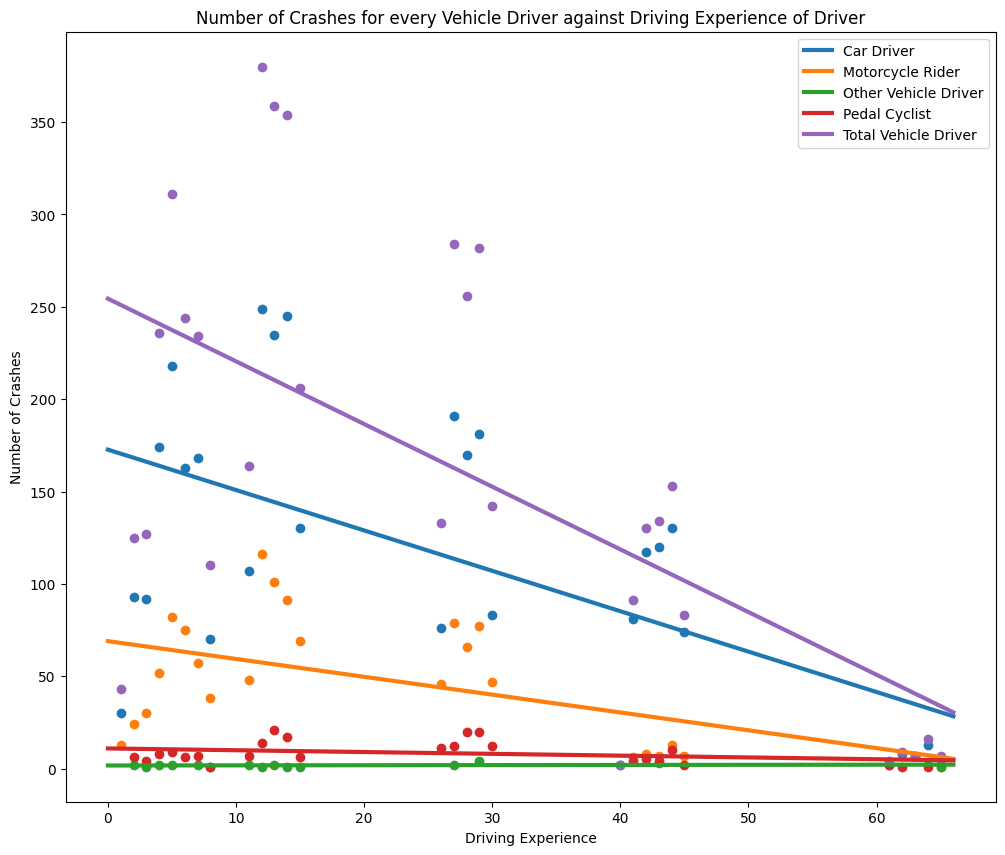

In [50]:
# Creates an aggregate function that counts the instances of each specified vehicle driver and group them together to a new table.
count_vehicle_crashes = {"Road User": "count"}

# List containing all the vehicle label for the graph and the data frames for each vehicle.
vehicle_labels = ["Car Driver", "Motorcycle Rider", "Other Vehicle Driver", "Pedal Cyclist", "Total Vehicle Driver"]
vehicle_drivers = [car_driver, motorcycle_rider, other_vehicle, pedal_cyclist, total_vehicle]

plt.figure(figsize=[12, 10])   # Expand the canvas size.
x_axis = np.linspace(0, 66)    # How long the linear fit will be.

# For loop to plot a best fit line for eahc vehicle driver.
for i in range(len(vehicle_drivers)):
    # Find the number of crashes against driving experience for the scatter and also calculate the best fit line.
    vehicle_crashes = vehicle_drivers[i].groupby(["Driving experience"]).agg(count_vehicle_crashes).reset_index()
    linear_vehicle = np.poly1d(np.polyfit(vehicle_crashes["Driving experience"], vehicle_crashes["Road User"], 1))
    
    # Plot the scatter points and best fit line.
    plt.scatter(vehicle_crashes["Driving experience"], vehicle_crashes["Road User"])
    plt.plot(x_axis, linear_vehicle(x_axis), label=vehicle_labels[i], linewidth=3)

# Set x axis and y axis and title lables.
plt.xlabel("Driving Experience")
plt.ylabel("Number of Crashes")
plt.title("Number of Crashes for every Vehicle Driver against Driving Experience of Driver")
plt.legend()    # Add a legend for each vehicle driver.
plt.show()      # Show the graph as output.

By plotting a best fit linear line, we can observe the relationship between Number of Crashes and Driving Experience.
<br>
<br>
A general downward trend can be obeserved from the graph above. The Total Vehicle Driver goes downwards from around 250 to below 50. As driving experience increases, the number of crashes decreases. This could be implying that drivers which has more years and experience driving seldom get into crashes and accidents as they do not make rookie mistakes or are more alert while driving, being able to avoid accidents on the road. Driving Experience and Number of Crashes for Vehicle Drivers have an inverse relationship.

## Task A8

### 1.

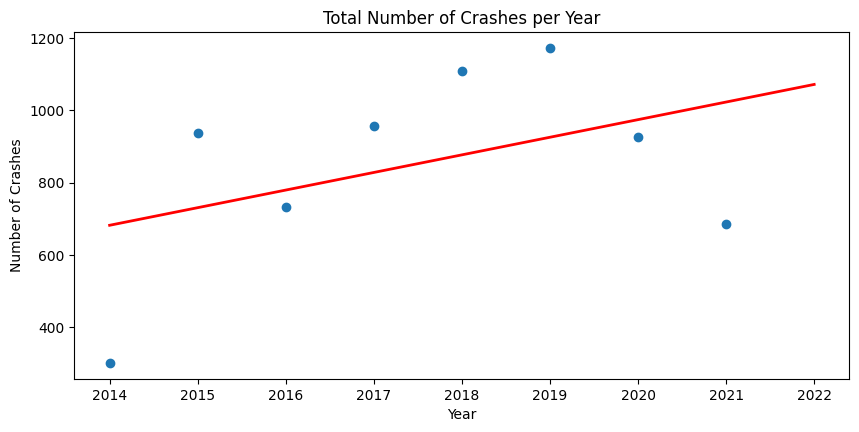

In [31]:
# Group the number of crashes with the year using the aggregate counting_vehicle_crashes.
# Will include both vehicle and non-vehicle drivers.
yearly_crash = a_road_deaths.groupby(["Year"]).agg(count_vehicle_crashes)

# Rename the Road User to Number of Crashes for Car Drivers.
yearly_crash.rename(
    columns = {"Road User" : "Number of Crashes"},
    inplace = True   # Replaces original dataset instead of creating a new one.
    )

# Flattens the table into one level.
yearly_crash = yearly_crash.reset_index()

# x-axis will be Driving experience while y will be the Number of Crashes for every vehicle driver.
x = yearly_crash["Year"]
y = yearly_crash["Number of Crashes"]
x_axis = np.linspace(2014, 2022)    # How long the linear fit will be.

# Calculate the Best fit line
linear_fit = np.poly1d(np.polyfit(x, y, 1)) # Draw linear fit line with order of 1.

# Plot a best fit line graph going through it.
plt.figure(figsize=[10, 4.5])   # Expand the canvas size.
plt.scatter(x, y)               # The actual truth values.
plt.plot(x_axis, linear_fit(x_axis), "-r", linewidth=2) # Plot the linear model.

# Set labels and titles.
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.title("Total Number of Crashes per Year")
plt.show()

Above is the best linear fit line for the graph of Number of Crashes plotted over Year. There is a general increase in the number of crashes as the years progresses.

### 2.

In [32]:
# Outputs the predicted number of crashes for 2022
predict_linear_crash = linear_fit(2022)
predict_linear_crash.round()    # Round it up as number of crashes cannot be in decimal.

1072.0

In 2022, the number of crashes would be around 1072 crashes if following the linear model in the graph plotted above.

### 3.

The linear best fit line drawn above has a large bias as the actual points are scattered around the best fit line and is underfitting.

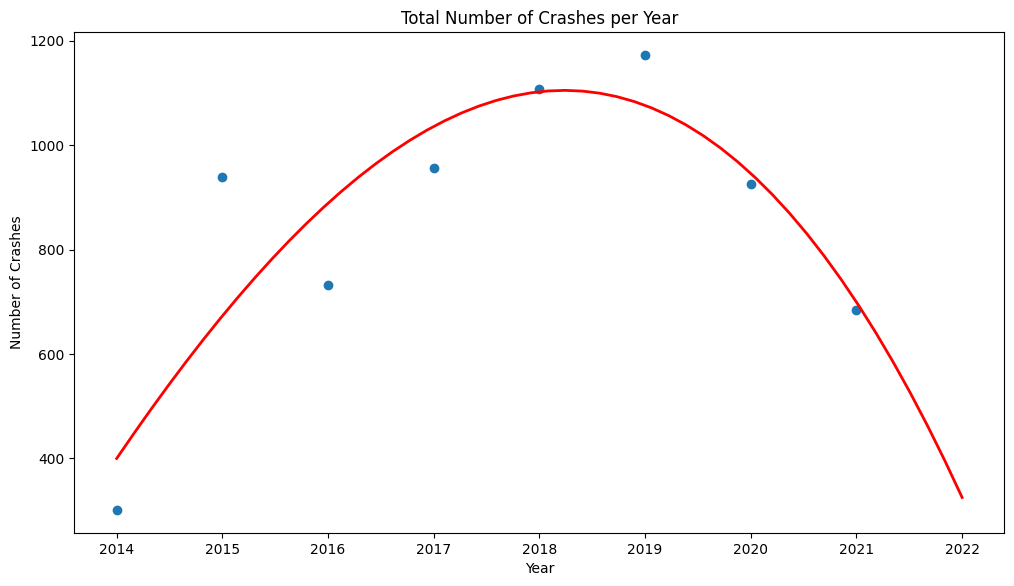

In [33]:
# Plot a poly fit graph
plt.figure(figsize=[12, 6.5])               # Expand the canvas size.
poly_fit = np.poly1d(np.polyfit(x, y, 3))   # Get the poly fit line. Use 3rd order poly.
x_axis = np.linspace(2014, 2022)            # How long the poly line will be.
plt.scatter(x, y)                           # Original truth values
plt.plot(x_axis, poly_fit(x_axis), "-r", linewidth=2)   # Plot the poly model.

# Set labels and titles.
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.title("Total Number of Crashes per Year")
plt.show()

The above model used is a better fit compared to the linear model used before. It has a lower bias compared to the linear model and the prediction is more accurate.

### 4.

In [34]:
# Outputs the predicted number of crashes for 2022
predict_poly_crash = poly_fit(2022)
predict_poly_crash.round()   # Round it up as number of crashes cannot be in decimal.

325.0

In 2022, the number of crashes would be around 325 crashes if following the poly model in the graph plotted above.

## Task A9

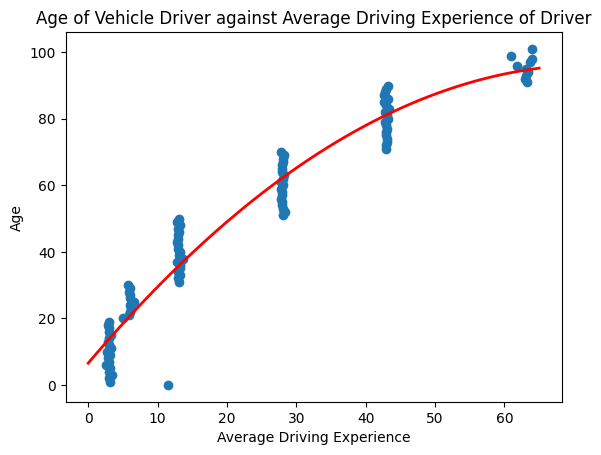

In [35]:
# Gets the dataframe with only Age and Driving experience.
age_driving_experience = a_road_deaths[["Age", "Driving experience"]].copy()

# Creates an aggregate function that averages the driving experiences and group it with their age.
average_driving_experience = {"Driving experience": "mean"}
mean_driving_experience = age_driving_experience.groupby(["Age"]).agg(average_driving_experience)

# Flattens the table into one level.
mean_driving_experience = mean_driving_experience.reset_index()

# x and y axis values are Average Driving experience and Age respectively.
x = mean_driving_experience["Driving experience"]
y = mean_driving_experience["Age"]
x_axis = np.linspace(0, 65)    # How long the poly fit will be.

# Calculate the Best fit line
poly_fit = np.poly1d(np.polyfit(x, y, 2)) # Draw poly fit line with order of 1.

# Plot the truth scatter plot and the poly best fit line.
plt.scatter(x, y)
plt.plot(x_axis, poly_fit(x_axis), "-r", linewidth=2)

# Add x and y axis labels and title.
plt.xlabel("Average Driving Experience")
plt.ylabel("Age")
plt.title("Age of Vehicle Driver against Average Driving Experience of Driver")
plt.show()

As found in A7, Age and Driving Experience has the highest correlation, so we can use this relationship to compare and predict the age of the counter-intuitive rows using their driving experience. A poly model is used instead of a linear regression model as it's a better fit with a lower bias compared to linear.

In [36]:
# Replaces all the counter-intuitive values found in A6.2 to their predicted age based on their driving experience.
for error_index in index_error:
    # Get their driving experience based on the index.
    driving_experience = a_road_deaths.loc[error_index, "Driving experience"]
    # Find predicted age based on their driving experiences. Round the numbers as age is not a decimal number.
    predicted_age = poly_fit(driving_experience).round()
    # Set their age to the new predicted age found above.
    a_road_deaths.loc[error_index, "Age"] = predicted_age

# Print out the counter-intuitive rows with their Ages now replaced with the poly model-based predicted values.
a_road_deaths.filter(items=index_error, axis=0)[["Age"]]

,Age
19,78
49,78
4638,78
6312,78


Get the predicted age for the counter-intuitive rows based on their Driving Experience. Since the rows with (-999) have a Driving Experience of 40, their predicted age based on the poly model is 78. Replace all the counter-intuitive values in the Age column from 0 to 78.

# Task B

In [37]:
# Read the CSV and assign it to variable song_dataset.
song_dataset = pd.read_csv("song_data.csv")

## Task B1

### 1.

In [38]:
# Input
input = song_dataset.iloc[:, [3, 4, 5, 6, 8, 11, 14]].values    # Acousticness, Danceability, Energy, Instrumentalness, Liveness, Speechiness, Audio Valance.
# Output
output = song_dataset.iloc[:, 1].values                         # Song popularity.

# Split for 75% being training set and 25% being testing set.
input_train, input_test, output_train, output_test = train_test_split(
    input, output, test_size = 0.25, random_state = 0
)

The X (Audio features) and y (Truth song popularity) are split into 75% for training set and 25% being the testing set.

### 2.

In [39]:
# Normalisation/Feature Scaling
sc = StandardScaler()
input_train = sc.fit_transform(input_train)
input_test = sc.transform(input_test)

# Fit the tree_classifier to the Training set.
tree_classifier = DecisionTreeClassifier(
 criterion = "entropy", random_state = 0
)
tree_classifier = tree_classifier.fit(input_train, output_train)

A Decision Tree model is used for the training set. 75% of the song dataset is used in the training model.

### 3.

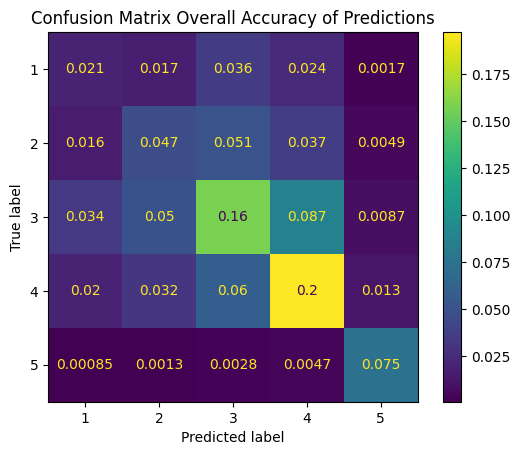

In [40]:
# Produce the predicted song popularity using the decision tree model.
output_predict = tree_classifier.predict(input_test)
# Create the confusion matrix normalized towards the entire training model to display accuracy of each class over the whole model.
# Accuracy = (True Positive / Total Predictions)
matrix_accuracy = confusion_matrix(output_test, output_predict, normalize="all", labels=tree_classifier.classes_)
# Display the normalized confusion matrix.
matrix_display = ConfusionMatrixDisplay(confusion_matrix=matrix_accuracy, display_labels=tree_classifier.classes_)
matrix_display.plot()
plt.title("Confusion Matrix Overall Accuracy of Predictions")
plt.show()

Above shows the normalized confusion matrix outputs based on our training and testing values. The values represents the ratio of frequency of the predicted labels over the total number of predictions made.

In [41]:
overall_accuracy = 0    # The overall accuracy of the whole training model used.

# Loop through the matrix and find the total correct predictions and the total predictions.
for column in range(len(matrix_accuracy)):
    overall_accuracy += matrix_accuracy[column][column]    # Calculate the total correct predictions for each row and then sum them.

# Calculate the overall accuracy of the model using the formula (Total Number of Correct Predictions / Total Number of Predictions)
overall_accuracy *= 100
overall_accuracy.round(1)   # Round it up to one decimal place.

49.8

As shown above, the overall accuracy of the multi-class classification is `49.8%`.

### 4.

One issue with using the overall accuracy of the multi-class classification, is that it ignores individual class-level metrics. This is a problem as certain class will have higher accuracy rates compared to others which will skew the overall accuracy rate of the entire model, giving a false impression of an accurate and reliable training model.

In [42]:
# Print a classification report for our model.
print(classification_report(output_test, output_predict))

              precision    recall  f1-score   support

           1       0.23      0.21      0.22       471
           2       0.32      0.30      0.31       732
           3       0.51      0.47      0.49      1591
           4       0.56      0.61      0.59      1518
           5       0.73      0.89      0.80       397

    accuracy                           0.50      4709
   macro avg       0.47      0.50      0.48      4709
weighted avg       0.49      0.50      0.49      4709



Above shows a classification report of our model. Precision is the percentage of correct predictions of a class among all other predictions for that class done by our model.
<br>
For example, the prediction of song popularity number 5 is `73%` which is high, however the song popularity number 1 has a prediction valie of `23%` which is abysmally low.
<br>
<br>
We can also look at the recall column for further insight on our model. Recall is the percentage of correct predictions of a class and the total frequency of that class.
<br>
For example, the prediction of song popularity number 5 is `89%` which is high, however the song popularity number 1 has a prediction valie of `21%` which is abysmally low
<br>
<br>
So the overall accuracy, which is `49.8%` is misleading as there are some classes with very low accuracy/prediction/recall, while some classes are higher. This results in a poor prediction model.

## Task B2

Link to dataset used: https://www.kaggle.com/datasets/raghurayirath/population-growth-vs-forest-cover

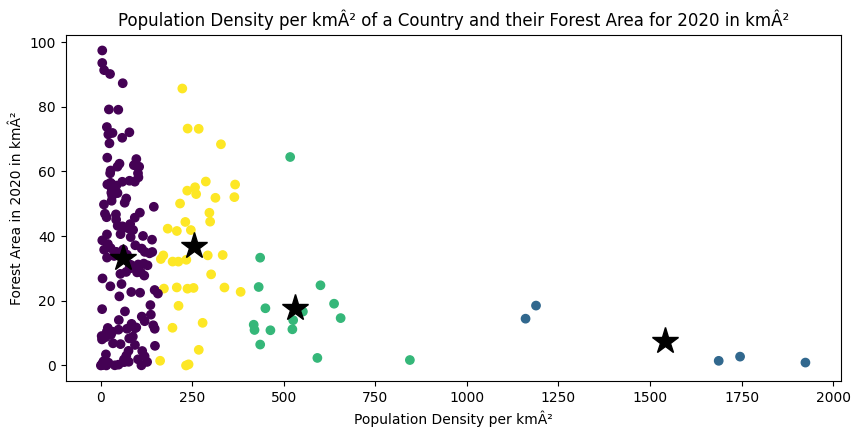

In [43]:
# Read the forest-cover-v1.xlsx file and assign the dataframe to forest_cover
forest_cover = pd.read_excel("forest-cover-v1.xlsx")

# Remove missing values and extreme outlier from dataframe.
forest_cover.dropna(inplace=True)
largest = forest_cover.nlargest(n = 1, columns = "Population Density (per kmÂ²)")
forest_cover = forest_cover.drop(largest.index)

# Run the K-means clustering over the forest_cover dataset using only the Population Density (per kmÂ²) column and the Forest Area 2020 column.
forest_cover_kmeans = KMeans(n_clusters = 4).fit(
    forest_cover[["Population Density (per kmÂ²)", "Forest Area 2020"]]
)

# Visualise the output labels
plt.figure(figsize=[10, 4.5])   # Expand the canvas size.
# Plot the scatter for Forest Area in 2020 against population density
plt.scatter(
    x = forest_cover["Population Density (per kmÂ²)"],
    y = forest_cover["Forest Area 2020"], 
    c = forest_cover_kmeans.labels_)

# Visualise the cluster centers (black stars)
plt.plot(
    forest_cover_kmeans.cluster_centers_[:, 0],
    forest_cover_kmeans.cluster_centers_[:, 1],
    "k*",
    markersize = 20
)
# Add axis labels and titles.
plt.xlabel("Population Density per kmÂ²")
plt.ylabel("Forest Area in 2020 in kmÂ²")
plt.title("Population Density per kmÂ² of a Country and their Forest Area for 2020 in kmÂ²")
plt.show()

There are 4 clusters found in the k-clustering done above. The graph displays the Forest Area of a country in 2020 in kmÂ² against their Population Density per kmÂ². What each cluster represents is the developness of a nation. 
<br>
<br>
The purple cluster are undeveloped, rural-based nations hence having a low population density as their cities are not centralised and people are spread throughout the country. In addition, they would have more Forest Area as less of their forest is cut down to make way for houses/buldings/farms etc.
<br>
The yellow cluster represent developing nations. As country develop, they shift their econmical focus on the secondary sector, therefore cutting down more forests to make products or make space for factories. As a result, the Forest Area will decrease. Furthermore, people will start to move into cities for job opportunities. Due to this, the population density will grow too.
<br>
The green cluster represents developed nations. As the economy booms, deforestation increases to fuel their growing industry. Because of this, the Forest Area in those countries shrink rapidly. In addition, rapid urbanization wil lead to a rise in population density as more and more people live in cities instead of the countryside.
<br>
The last blue cluster represent highly developed nations or micro-nations. As micro-nations do not have much space, high-rise buildings are preferred hence a higher population density. As they also do not have much space within their borders, almost all forests will be removed.
<br>
<br>
Overall, each cluster will represent a nation with varying level of "developness" or income.